## In this assignment we will test the hypothesis that the economic growth of the German Stock market was the same during 2 equal periods of times,
- We test the null hypothesis using t table
- We use a significance level of 5%

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("1. Load the data: ")

1. Load the data: 


In [3]:
dax=pd.read_csv('EUstock.csv')['DAX']

In [4]:
len(dax)/2


930.0

In [5]:
print("2. Split the data into 2 halves: ")

2. Split the data into 2 halves: 


In [6]:
half_1=dax.loc[:len(dax)/2-1]

In [7]:
half_2=dax.loc[len(dax)/2:]

In [8]:
len(half_2)

930

In [9]:
len(half_1)

930

In [10]:
print("3. Claculate mean and std of 1st half: ")

3. Claculate mean and std of 1st half: 


In [11]:
print("mean: ", half_1.mean())

mean:  1822.8727419354855


In [12]:
print("standard d: ",half_1.std())

standard d:  241.15169373506328


In [13]:
print("4. Claculate mean and std of 2nd half: ")

4. Claculate mean and std of 2nd half: 


In [14]:
print("mean: ", half_2.mean())

mean:  3238.441021505378


In [15]:
print("standard d: ",half_2.std())

standard d:  1137.3952192152863


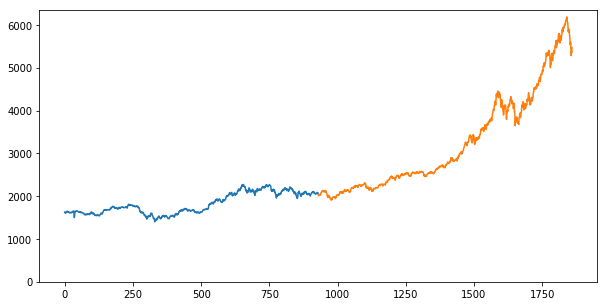

In [16]:
plt.figure(figsize=(10,5))
plt.ylim(0,6350)
plt.plot((half_1))
plt.plot((half_2))
plt.show()

### We can see, by just drawing, that of course they are not the same, 
- however let's make things more quantified

In [17]:
print("5. q is a random variable, representing the difference between the 2 samples: ")

5. q is a random variable, representing the difference between the 2 samples: 


In [18]:
q=half_1.mean()-half_2.mean()
print(q)

-1415.5682795698926


In [19]:
print("6. Calculate the variance of q, (the difference): ")

6. Calculate the variance of q, (the difference): 


In [20]:

qvar=np.array(half_1).var()/(len(half_1))+np.array(half_2).var()/(len(half_2))
print("q variance: ",qvar)
print("i.e. Standard error for the difference of means: " , qvar**0.5)

q variance:  1452.00908819
i.e. Standard error for the difference of means:  38.1052370179


In [21]:
print("We can draw a gaussian distribution of q, where the center mean is q (as calculated above) and standard deviation as calculated in this step's standard error.")

We can draw a gaussian distribution of q, where the center mean is q (as calculated above) and standard deviation as calculated in this step's standard error.


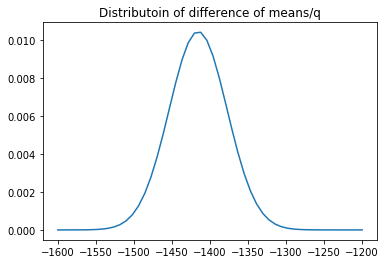

In [22]:
x = np.linspace(-1600,-1200)
y = stats.norm.pdf(x, loc=q, scale=qvar**0.5)    
plt.plot(x,y)
plt.title("Distributoin of difference of means/q")
plt.show()

In [23]:
print("7. With significance level of 5%, test the Hypothesis that m1=m2 ")
print("We don't know the population standard deviation since those are 2 samples, so I use t test as below.")

7. With significance level of 5%, test the Hypothesis that m1=m2 
We don't know the population standard deviation since those are 2 samples, so I use t test as below.


In [24]:
alpha=0.05

In [25]:
t_value=(q)/((qvar)**0.5) 
# the difference in means divided by the standard deviation of the means 
print(t_value)

-37.1489167986


In [26]:
tcritical_from_table=1.962 # alpha 0.05 2 tailed test

In [27]:
print("Checkingt from the stats package: ")

Checkingt from the stats package: 


In [28]:
print(stats.t.ppf((1-alpha/2), len(half_1)-1))

1.9625208332


### I try to visualize the pdf and q 

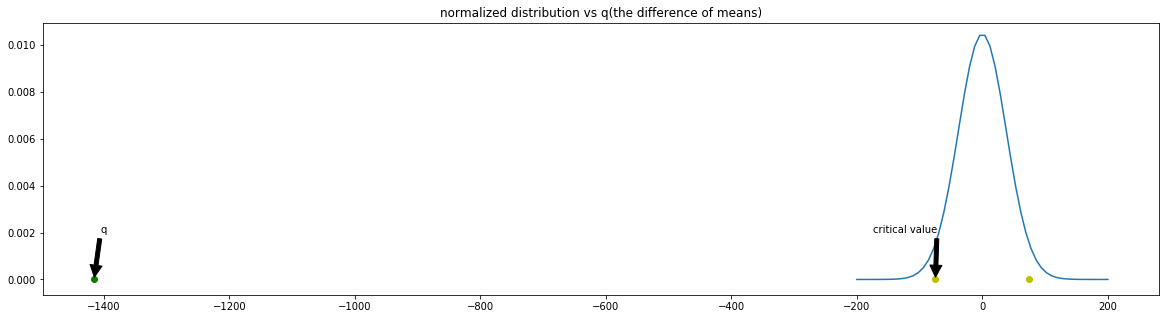

In [29]:
plt.figure(figsize=(20,5))
x = np.linspace(-200,200)
y = stats.norm.pdf(x, loc=0, scale=qvar**0.5)    
plt.plot(x,y)
plt.scatter([(1.962*(qvar**0.5)),(-1.962*(qvar**0.5))],[0,0],c='y')
plt.annotate('critical value', xy=(-(1.962*(qvar**0.5)), 0),xytext=((-1.962*(qvar**0.5))-100, 0.002),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter([(q)],[0],c='g')
plt.annotate('q', xy=(q,0),xytext=(q+10, 0.002),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("normalized distribution vs q(the difference of means)")
plt.show()

In [31]:
print ("Pvalue is almost 0...")

Pvalue is almost 0...


In [32]:
stats.ttest_ind(half_1,half_2)

Ttest_indResult(statistic=-37.128938890874657, pvalue=3.3756087351451227e-226)

### Since t<<tcritical from the table(-1.962 & 1.962), we reject the null hypothesis